In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:.2f}".format



In [2]:
cus_acq = pd.read_csv(r"C:\Users\ACER\Downloads\python assingments\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
repayment = pd.read_csv(r"C:\Users\ACER\Downloads\python assingments\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv")
spend = pd.read_csv(r"C:\Users\ACER\Downloads\python assingments\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv")

In [3]:
cus_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.00,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.00,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.00,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.00,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.00,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.00,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.00,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.00,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.00,C22,Self Employed


In [4]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [5]:
a = pd.merge(how="inner", left=cus_acq, right=repayment, on="Customer" )

In [6]:
final = pd.merge(how="inner", left=a , right=spend , on="Customer")
final.drop({"Unnamed: 4"},axis=1, inplace=True)

In [7]:
final.rename({"Amount_x":"repayment_amount", "Amount_y":"spend_amount"}, axis=1 , inplace=True)
final.rename({"Month_x":"repayment_date", "Month_y":"spend_date"}, axis=1 , inplace=True)

In [8]:
final

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,repayment_date,repayment_amount,Sl No:,spend_date,Type,spend_amount
0,1,A1,76,BANGALORE,Gold,500000.00,C1,Self Employed,NaN,12-Jan-04,495414.75,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.00,C1,Self Employed,NaN,12-Jan-04,495414.75,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.00,C1,Self Employed,NaN,12-Jan-04,495414.75,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.00,C1,Self Employed,NaN,12-Jan-04,495414.75,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.00,C1,Self Employed,NaN,12-Jan-04,495414.75,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54,CHENNAI,Silver,100000.00,C19,Salaried_Pvt,98.00,25-Jan-04,310992.30,98,25-Jan-04,BIKE,54729.66
37280,97,A97,58,TRIVANDRUM,Platimum,10000.00,C20,Govt,99.00,12-Jan-04,121874.90,99,12-Jan-04,AUTO,139018.26
37281,98,A98,51,CALCUTTA,Platimum,10001.00,C21,Normal Salary,100.00,3-Jan-04,337815.57,100,3-Jan-04,SHOPPING,284521.06
37282,99,A99,35,CALCUTTA,Platimum,10002.00,C22,Self Employed,101.00,15-Jan-04,25682.73,101,15-Jan-04,AIR TICKET,90184.22


##  a. In case age is less than 18, replace it with mean of age values

In [9]:
final.Age[final.Age<18] = 43.24

<ipython-input-9-dba9ca67f652>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.Age[final.Age<18] = 43.24


## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
## (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [10]:
final.spend_amount[final.spend_amount>final.Limit]  = ((final.Limit)*0.5)

<ipython-input-10-679ab80d6137>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.spend_amount[final.spend_amount>final.Limit]  = ((final.Limit)*0.5)



##  c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [11]:
final.repayment_amount[final.repayment_amount>final.Limit]  = (final.Limit)

<ipython-input-11-b503d16fa0b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.repayment_amount[final.repayment_amount>final.Limit]  = (final.Limit)


## 2. From the above dataset create the following summaries:
## a. How many distinct customers exist?


In [12]:
final.Customer.value_counts()

## So there are 100 distinct customers exsit.

A61    1444
A60    1444
A22    1089
A21    1089
A39     961
       ... 
A96       1
A80       1
A84       1
A76       1
A82       1
Name: Customer, Length: 100, dtype: int64

##  b. How many distinct categories exist?

In [13]:
final.drop({'No', 'SL No:','Sl No:'} ,axis=1, inplace=True)

In [14]:
final.info()

## There are 12 distinct categories 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37284 entries, 0 to 37283
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer          37284 non-null  object 
 1   Age               37284 non-null  float64
 2   City              37284 non-null  object 
 3   Product           37284 non-null  object 
 4   Limit             37284 non-null  float64
 5   Company           37284 non-null  object 
 6   Segment           37284 non-null  object 
 7   repayment_date    37284 non-null  object 
 8   repayment_amount  37284 non-null  float64
 9   spend_date        37284 non-null  object 
 10  Type              37284 non-null  object 
 11  spend_amount      37284 non-null  float64
dtypes: float64(4), object(8)
memory usage: 3.7+ MB


## c. What is the average monthly spend by customers?

In [15]:
final.spend_date = final.spend_date.astype(np.datetime64)
final["spend_month"]= final.spend_date.dt.month

In [16]:
final[["Customer", "spend_month", "spend_amount"]]

,Customer,spend_month,spend_amount
0,A1,1,485470.80
1,A1,1,410556.13
2,A1,1,23740.46
3,A1,1,484342.47
4,A1,1,369694.07
...,...,...,...
37279,A96,1,54729.66
37280,A97,1,5000.00
37281,A98,1,5000.50
37282,A99,1,5001.00


In [17]:
final.groupby(["Customer", "spend_month"]).agg(avg_spend = ("spend_amount", "mean"))

avg_spend
Customer spend_month           
A1       1            372762.59
         2            175235.69
         4            261649.25
         5            361141.31
         8            344372.10
...                         ...
A95      1            240401.50
A96      1             54729.66
A97      1              5000.00
A98      1              5000.50
A99      1              5001.00

[578 rows x 1 columns]

## d. What is the average monthly repayment by customers?


In [18]:
final.repayment_date = final.repayment_date.astype(np.datetime64)
final["repayment_month"]= final.repayment_date.dt.month

In [19]:
 final.groupby(["Customer", "repayment_month"]).agg(avg_repayment = ("repayment_amount", "mean"))

avg_repayment
Customer repayment_month               
A1       1                    343972.33
         2                    156374.76
         4                    254474.58
         7                    297176.74
         9                    186427.50
...                                 ...
A95      1                    369405.96
A96      1                    100000.00
A97      1                     10000.00
A98      1                     10001.00
A99      1                     10002.00

[558 rows x 1 columns]

 ## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [20]:
final["spend_year"]=final.spend_date.dt.year

In [21]:
interest_cal = final.groupby(["spend_year","spend_month"])["spend_amount","repayment_amount"].sum()

<ipython-input-21-2d01a515d93c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_cal = final.groupby(["spend_year","spend_month"])["spend_amount","repayment_amount"].sum()


In [22]:
interest_cal["monthly_profit"] = interest_cal["repayment_amount"]-interest_cal["spend_amount"]
interest_cal.monthly_profit = interest_cal.monthly_profit.astype("str")

In [23]:
interest_cal["final_monthly_profit"] = np.where( [i[0] == "-" for i in interest_cal.monthly_profit],0,interest_cal.monthly_profit )
interest_cal.final_monthly_profit = interest_cal.final_monthly_profit.astype("float")

In [24]:
 interest_cal["Interest_Earned_monthly"] = (interest_cal.final_monthly_profit*2.9)/100

In [25]:
interest_cal.Interest_Earned_monthly

spend_year  spend_month
2004        1             2754331.53
            2              597940.12
            3              114536.08
            4              527777.02
            5              412641.93
            9                   0.00
            11             574425.88
2005        1                   0.00
            2             3402288.79
            4              253505.99
            5             1534326.96
            6                   0.00
            7              348574.18
            8              238433.40
            9              237137.00
            10             452248.37
            11                  0.00
            12             778989.45
2006        1              198872.79
            2                   0.00
            3             3003460.68
            4             1352025.21
            5              370626.81
            6              146092.57
            7                   0.00
            8              219413.31
            9 

##  f. What are the top 5 product types?


In [26]:
final.Type.value_counts()

### PETRO, CAMERA  , FOOD , AIR TICKET &   TRAIN TICKET      


PETRO           4829
CAMERA          4237
FOOD            4056
AIR TICKET      3537
TRAIN TICKET    3387
SHOPPING        2788
BUS TICKET      2417
JEWELLERY       2381
CLOTHES         2243
RENTAL          2021
MOVIE TICKET    1820
BIKE            1255
AUTO             971
CAR              682
SANDALS          660
Name: Type, dtype: int64

##  g. Which city is having maximum spend?

In [27]:
final.groupby("City").agg(max_spend = ("spend_amount", "mean")).max_spend.max()

## CALCUTTA have maximum spend 

182577.4403801431

## h. Which age group is spending more money?

In [28]:
final.groupby("Age").agg(max_spend = ("spend_amount", "mean"))
## Age group of 77 have max spend 

,max_spend
Age,
19.00,5001.00
21.00,175191.98
24.00,257342.04
25.00,203456.54
26.00,47276.43
27.00,30238.58
28.00,182849.05
29.00,265535.72
31.00,312714.37


## i. Who are the top 10 customers in terms of repayment?


In [29]:
repayment_mean = final.groupby(["Customer"]).agg(mean_repayment = ("repayment_amount","mean"))


In [30]:
repayment_mean.mean_repayment.sort_values(ascending=False).to_excel("customer_repayment.xlsx")

In [31]:
## Top 10 customers in terms of repayment 
## A89
## A80
## A92
## A95
## A65
## A93
## A82
## A63
## A54
## A13


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [32]:
final["spend_year"]=final.spend_date.dt.year

In [33]:
customer_spend = pd.pivot_table(data=final , index=["City","spend_year"], columns="Product", aggfunc="sum",values="spend_amount" )

Text(0.5, 1.0, 'Amount spended by customers according to year and city')

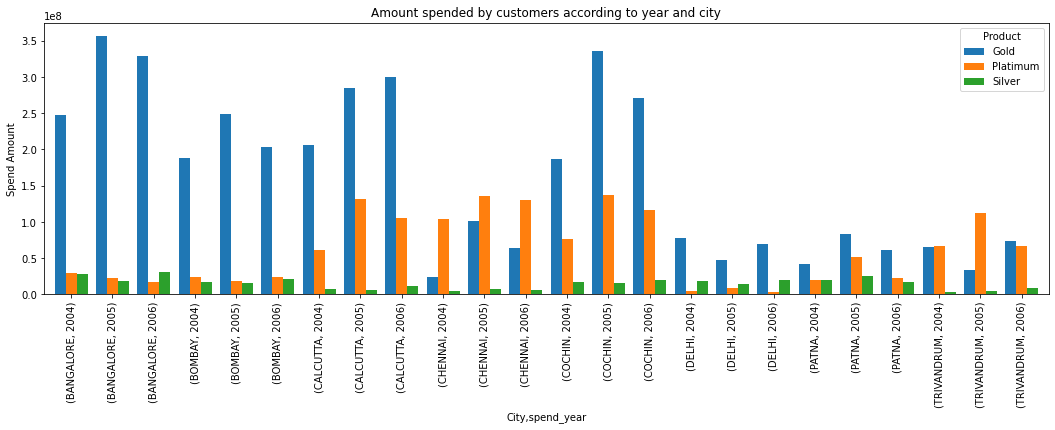

In [34]:
customer_spend.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")

## 4. Create graphs for

##  a. Monthly comparison of total spends, city wise

In [35]:
city_spend = final.groupby(["City"]).agg(total_spend = ("spend_amount", "sum"))

<AxesSubplot:xlabel='City'>

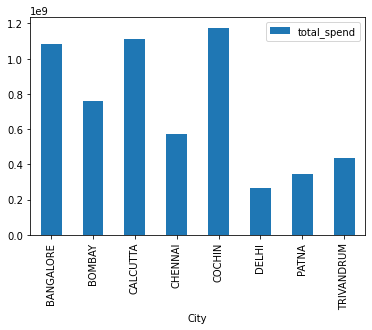

In [36]:
city_spend.plot.bar()

##  b. Comparison of yearly spend on air tickets

In [37]:
spend_type = pd.pivot_table(data=final, index= "spend_year",columns="Type", aggfunc="sum", values="spend_amount")

Text(0, 0.5, 'spend_amount')

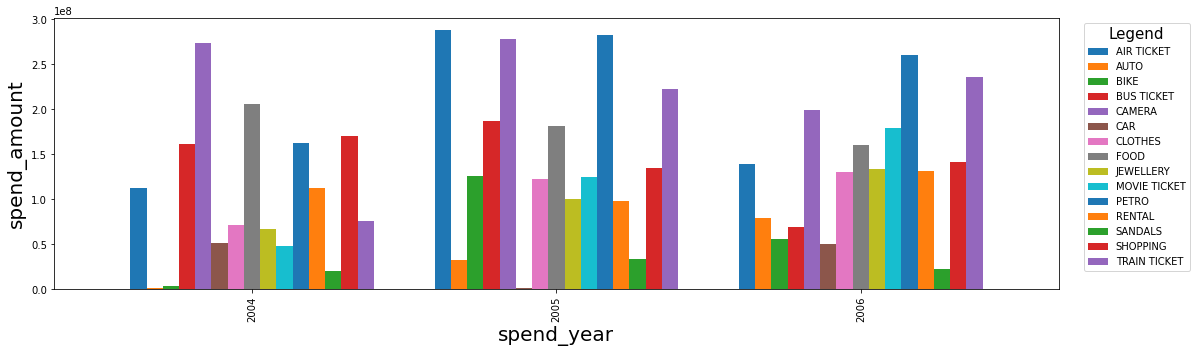

In [38]:
spend_type.plot(kind="bar",figsize=(18,5),width=0.8)
plt.legend(title= 'Legend', title_fontsize = 15, bbox_to_anchor= (1.02, 1))
plt.xlabel("spend_year", size = 20 ) 
plt.ylabel("spend_amount", size = 20 )

##  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


Text(0, 0.5, 'spend_amount')

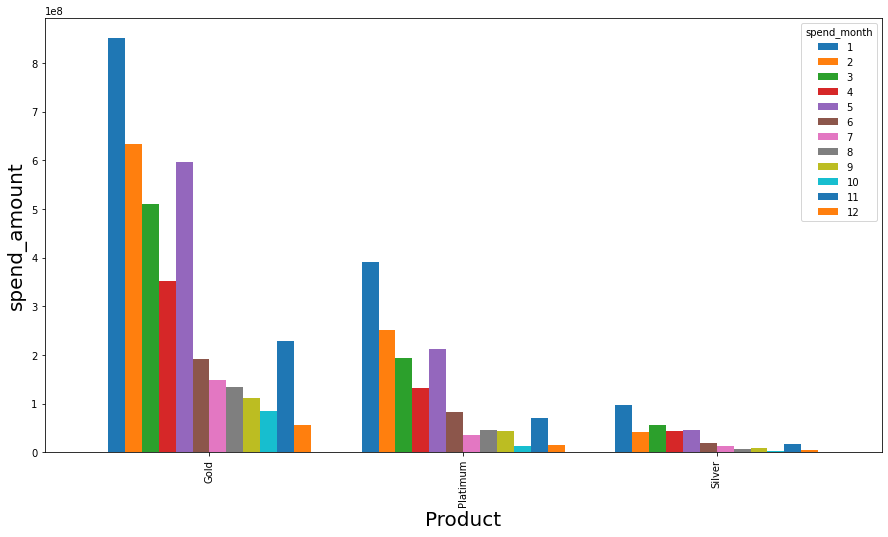

In [39]:
pd.pivot_table(data=final, index="Product",columns="spend_month", aggfunc="sum", values="spend_amount").plot(kind="bar",figsize=(15,8),width=0.8)
plt.xlabel("Product", size = 20 ) 
plt.ylabel("spend_amount", size = 20 )

In [40]:
## By ploting we can make following concussion: 
## a. gold is the higest selling product amoung three.
## b. silver is the least selling product.
## c. for all 3 product first 4-5 month that is from jan to may the sales is high then it lowerdown.
## d. for all 3 product the last month that is december month sale is the least. 


## 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.


In [55]:
final.repayment_month = final.repayment_date.dt.strftime("%B")
final['repayment_year'] = final.repayment_date.dt.strftime("%Y")

In [56]:
final

,Customer,Age,City,Product,Limit,Company,Segment,repayment_date,repayment_amount,spend_date,Type,spend_amount,spend_month,repayment_month,spend_year,repayment_year
0,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-12,495414.75,2004-01-12,JEWELLERY,485470.80,1,January,2004,2004
1,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-12,495414.75,2004-01-03,PETRO,410556.13,1,January,2004,2004
2,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-12,495414.75,2004-01-15,CLOTHES,23740.46,1,January,2004,2004
3,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-12,495414.75,2004-01-25,FOOD,484342.47,1,January,2004,2004
4,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-12,495414.75,2005-01-17,CAMERA,369694.07,1,January,2005,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.00,CHENNAI,Silver,100000.00,C19,Salaried_Pvt,2004-01-25,100000.00,2004-01-25,BIKE,54729.66,1,January,2004,2004
37280,A97,58.00,TRIVANDRUM,Platimum,10000.00,C20,Govt,2004-01-12,10000.00,2004-01-12,AUTO,5000.00,1,January,2004,2004
37281,A98,51.00,CALCUTTA,Platimum,10001.00,C21,Normal Salary,2004-01-03,10001.00,2004-01-03,SHOPPING,5000.50,1,January,2004,2004
37282,A99,35.00,CALCUTTA,Platimum,10002.00,C22,Self Employed,2004-01-15,10002.00,2004-01-15,AIR TICKET,5001.00,1,January,2004,2004


In [77]:
 def get_report(product,timeperiod):
     
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        
        pivot = final.pivot_table(index=['Product','City','Customer'],columns='repayment_month',aggfunc='sum',values='repayment_amount')
        
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        
        pivot = final.pivot_table(index=['Product','City','Customer'],columns='repayment_year',aggfunc='sum',values='repayment_amount')
        
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        
        pivot = final.pivot_table(index=['Product','City','Customer'],columns='repayment_month',aggfunc='sum',values='repayment_amount')
        
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        
        pivot = final.pivot_table(index=['Product','City','Customer'],columns='repayment_year',aggfunc='sum',values='repayment_amount')
        
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        
        pivot = final.pivot_table(index=['Product','City','Customer'],columns='repayment_month',aggfunc='sum',values='repayment_amount')
        
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        
        pivot = final.pivot_table(index=['Product','City','Customer'],columns='repayment_year',aggfunc='sum',values='repayment_amount')
        
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    
    return result

In [78]:
get_report(product="Gold", timeperiod="yearly")

repayment_year                      2004         2005         2006
Product City       Customer                                       
Gold    BANGALORE  A1        42476361.12  27524857.86  15565231.08
                   A13       72447395.87 116487863.00 107796761.59
                   A14       85878100.30  77251429.91  83111797.32
                   A30       26426983.59  72029152.26  67147877.07
                   A43       59101421.57 124215654.60  79868939.09
                   A63        2366566.80          NaN    633351.36
                   A81               NaN          NaN    207780.32
                   A88               NaN          NaN    146821.30
                   A92               NaN          NaN    459105.69
        COCHIN     A11       17254015.02  36818475.84  41524321.68
                   A16       22444223.20  24524943.20  38227392.60
                   A32        4820377.38   9753428.44  21242321.10
                   A45       79296369.09 125315874.67  57286137.21
                   A61       95689888.10 162520700.90 142276841.58
                   A65         937845.20    461334.68          NaN
                   A90               NaN          NaN    109931.32
                   A94         153465.89          NaN          NaN
        CALCUTTA   A10       16059429.54  22443190.74  28019035.08
                   A15       21030052.20  34415375.80  55662828.60
                   A29       37173436.38  46083038.94  92726046.00
                   A31        5706387.82  20280983.94  21389177.74
                   A60      109847428.78 142228531.80 123223087.54
                   A89               NaN          NaN    497237.97
        BOMBAY     A12       72511507.90  89205237.30  96660819.76
                   A17       28508960.40  14622876.60  62555662.80
                   A42       94423356.01  96898511.33  44757419.32
                   A62       33138170.75  29290726.99  31997628.11
                   A91               NaN          NaN    247781.00
        CHENNAI    A27       49756222.08  75129976.17  64462116.87
                   A67         135691.20    111277.54          NaN
        TRIVANDRUM A28       26057929.23  76329265.14  91168595.55
        PATNA      A26       40241551.68  65713624.65  89921375.10
                   A66         954079.56          NaN    226189.16
                   A95         369405.96          NaN          NaN
        DELHI      A44       66630888.50 129124850.87  44330894.35
                   A64               NaN          NaN    646458.18
                   A82               NaN          NaN    342200.74
                   A93         342326.14          NaN          NaN